# Dicoding Academy 


**Satria nur saputro**<br>
**satrianursaputro06@gmail.com**


Lakukan proses di atas menggunakan dataset review product https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing


**Permasalahan**:
melakukan sentiment analysis salah satu aplikasi dari marketplace app pada review-review product.

**! Ingat**<br>
Kolom Ratings adalah target.

**solusi**: menerapkan classification untuk mengetahui feedback konsumen dalam mengkategorikan rating 1-5




#Domain Proyek

Melakukan melakukan sentiment analysis salah satu aplikasi dari marketplace app pada review-review product, dikarenakan sulitnya seorang bisnis dalam mendapatkan feedback atau saran dalam product yang dibuat dari mulai prasana tahap pembuatan sampai diterima ketangan konsumen, perlu adanya sebuah solus agar bisnis lebih cepat untuk mendapatkan insight lebih feedback feedback yang diterima


#Business Understanding

##Permasalahan:


1.   Kenapa pentingnya AI diterapkan pada masalah ini ?
2.   Bagaimana memahami pentingnya feedback pengguna ?
3.   Apa dampak rating dalam product ?

##Goal:



1.   Bidang AI diterapkan dalam permasalahan ini yaitu kemudahan dalam mengkategorikan sebuah feedback sehingga sebuah perusahaan dapat ber-intropeksi dan mengedepankan inovasi serta pelayanan lebih baik
2.   Sebuah feedback dari konsumen merupakan sebuah data atau saran/review product yang kita punya, sehingga kita lebih bisa mengetahui apa saja kekurangan & kelebihan produk kita serta melihat pasar konsumen apa yang mereka mau dari berbagai inovasi product yang kita sediakan untuk dibeli konsumen
3.   Pentingnya sebuah rating yaitu kualitas kepercayaan konsumen semakin tinggi, validasi sebuah brand, dan peningkatan penjualan terhadap seo sebuah marketplace


##Solution statements
 
 

1.   Mencoba melakuakan Feature TF-IDF, BoW, Feature selection
2.   Menggunakan finetunning sebuah model dengan algoritma SGD
3.   Melakukan validasi menggunakan random shufflesplit dan cross_validation





#Data Understanding

##variabel


itemId : id produk

category: category produk

name : nama produk	

rating: rating produk

originalRating : rating semula

reviewTitle : judul review

reviewContent : isi review

likeCount : jumlah suka product

upVotes : votes produk	
downVotes : votes produk

helpful: boolen manfaat produk
relevanceScore : score relevan product
boughtDate : tanggal penjualan
clientType : jenis kliean
retrievedDate : tanggal diterima

##catatan
tahap yang digunakan dalam masalah ini hanya menggunakan variabel rating dan review content

#Data Preparation

-melakukan data akusisi

-melakukan cleansing data

-melakukan preprocessing : 

1.   casefolding
2.   normalisasi
3.   stopword

-feature engginering

1.   TF-IDF
2.   Bow
3.   Feature Selection



#Modeling


kelebihan SGD: 


1.   Cocok untuk masalah classification
2.   Digunakan untuk masalah supervised
3.   algoritma sederhana cepat
4.   bagus untuk untuk data tidak begitu banyak


kekurangan SGD:


1.   machine learning tradisional
2.   jika banyak data akan kesulitan dalam mencapai akurasi optimal
3.   beberapa masalah data tidak dapat dikategorika algoritma ini bagus dengan algoritma yang lain




menggunakan algoritma SGD dengan fine tunning 

*   loss="hinge", penalty="l2", max_iter=5

serta split dataset 80%:20%, training dan testing



# Evaluasi

menggunakan 

1.   confusion matrix
2.   recall
3.   precision
4.   f1


Juga shufflesplit dan cross_validation untuk menguji accuracy model



# 1. Import library

In [ ]:
#install library sastrawi
!pip install Sastrawi

In [ ]:
#memanggil library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 
# Untuk mempermudah, simpan setiap objek agar dapat digunakan untuk pemodelan maupun deployment. Gunakan library Pickle
import pickle
import seaborn as sns

%matplotlib inline

In [ ]:
import nltk #libray stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 2. Data Acquisition

In [ ]:
from google.colab import drive #connect ke g-drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#membaca dataset
df = pd.read_csv('/content/drive/MyDrive/Orbit/20191002-reviews.csv')

In [ ]:
df.head() #membaca dataset top 5 dari atas

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


In [ ]:
df.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203787 entries, 0 to 203786
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   itemId          203787 non-null  int64  
 1   category        203787 non-null  object 
 2   name            203787 non-null  object 
 3   rating          203787 non-null  int64  
 4   originalRating  8 non-null       float64
 5   reviewTitle     23404 non-null   object 
 6   reviewContent   107029 non-null  object 
 7   likeCount       203787 non-null  int64  
 8   upVotes         203787 non-null  int64  
 9   downVotes       203787 non-null  int64  
 10  helpful         203787 non-null  bool   
 11  relevanceScore  203787 non-null  float64
 12  boughtDate      196680 non-null  object 
 13  clientType      203787 non-null  object 
 14  retrievedDate   203787 non-null  object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 22.0+ MB


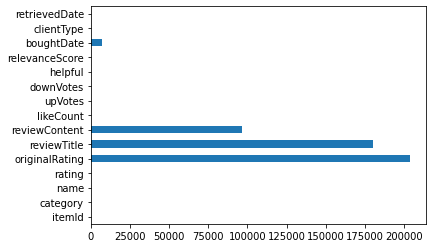

In [ ]:
df.isna().sum().plot(kind='barh') #visualisasi jumlah bar horizontal file null

# 3. Data Cleansing

In [ ]:
# memilih kolom rating dan reviewContent
df_new = df[['rating', 'reviewContent']]
df_new #menampilkan dataset

,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
4,5,NaN
...,...,...
203782,5,barang bagus dengan harga kompetitif
203783,3,NaN
203784,5,NaN
203785,3,Ok.thank lazada Pagi order sore barang nyampe ...


In [ ]:
# drop nilai nan
df_new.dropna(inplace=True)
df_new.head() #top 5 teratas

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,rating,reviewContent
0,5,bagus mantap dah sesui pesanan
1,4,"Bagus, sesuai foto"
2,5,okkkkk mantaaaaaaapppp ... goood
3,4,bagus sesuai
7,1,bima


In [ ]:
df_new_cut = df_new.sample(5000) #melakukan sampeling 5000 data

In [ ]:
print('Total Data:', df_new_cut.shape[0], 'data\n')
print('terdiri dari (rating):')
print('-- [1] Data yang pertama\t:', df_new_cut[df_new_cut.rating == 1].shape[0], 'data')
print('-- [2] Data yang kedua\t        :', df_new_cut[df_new_cut.rating == 2].shape[0], 'data')
print('-- [3] Data yang ketiga\t        :', df_new_cut[df_new_cut.rating == 3].shape[0], 'data')
print('-- [4] Data yang ketiga\t        :', df_new_cut[df_new_cut.rating == 4].shape[0], 'data')
print('-- [5] Data yang ketiga\t        :', df_new_cut[df_new_cut.rating == 5].shape[0], 'data')

Total Data: 5000 data

terdiri dari (rating):
-- [1] Data yang pertama	: 313 data
-- [2] Data yang kedua	        : 101 data
-- [3] Data yang ketiga	        : 214 data
-- [4] Data yang ketiga	        : 469 data
-- [5] Data yang ketiga	        : 3903 data


In [ ]:
df_new_cut.describe() #dataset statistik

,rating
count,5000.000000
mean,4.509600
std,1.099159
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


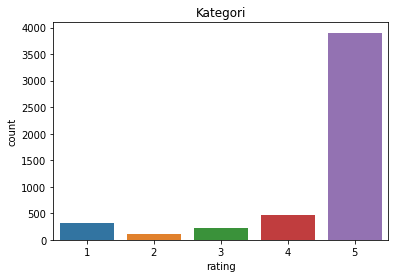

In [ ]:
plt.title('Kategori') #visualisasi judul
sns.countplot(df_new_cut.rating) #gruping kategori data per rating 

# 4. Data Preprocessing

## 4.1 Casefolding

In [ ]:
# case folding
def casefolding(text):
  text = text.lower()                                 # Ubah jadi lowercase
  text = re.sub(r'https?://\S+|www\.\S+', '', text)   # Menghapus URL
  text = re.sub(r'[-+]?[0-9]+', '', text)             # Menghapus karakter angka
  text = re.sub(r'[^\w\s]', '', text)                 # Menghapus karakter tanda baca
  text = text.strip()                                 #menghapus spasi berlebih
  return text #return text

## 4.2 Normalisasi

In [ ]:
# Download corpus singkatan
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

#import data
key_norm = pd.read_csv('key_norm.csv')
#fungsi word normalization
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

--2022-03-31 03:31:05--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.2’

key_norm.csv.2      100%[===================>]  79.07K  --.-KB/s    in 0.009s  

2022-03-31 03:31:05 (8.38 MB/s) - ‘key_norm.csv.2’ saved [80969/80969]



## 4.3 Stopword Removal

In [ ]:
stopwords_id = stopwords.words('indonesian') #stopword indo

# Buat stopwords removal
def remove_stopwords(text):
  clean_word = []
  all_text = text.split()
  for word in all_text:
    if word not in stopwords_id:
      clean_word.append(word)
  return ' '.join(clean_word)

## 4.4 Stemming

In [ ]:
#deklarasi steam
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemming
def stemming(text):
  text = stemmer.stem(text)
  return text

## 4.5 Memanggil semua fungsi

In [ ]:
# Buat fungsi untuk menggabungkan seluruh langkah pada text preprocessing

def data_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stopwords(text)
  text = stemming(text)
  return text

In [ ]:
%%time
df_new_cut['cleanReview'] = df_new_cut['reviewContent'].apply(data_preprocessing)
# Perhatikan waktu komputasi ketika proses text preprocessing (CPU)

CPU times: user 14min 16s, sys: 2.58 s, total: 14min 19s
Wall time: 14min 33s


In [ ]:
df_new_cut #melihat dataset

,rating,reviewContent,cleanReview
184631,5,ok.mantep,okmantep
82076,1,"barang yg datang gak ada tutup nya, berarti ga...",barang tutup nya sesuai gambar
193390,4,Secara keseluruhan produk ini sudah bagus utk ...,produk bagus harga gin puas ukur subtitle puta...
44420,5,"Bagus, murah, pengirimannya aja yg agak lama.",bagus murah kirim
22957,5,"pengiriman cepat, barang ori.",kirim cepat barang original
...,...,...,...
102787,4,ok,ok
117706,5,"Akhirnya, saya bisa nobar sama para binatang p...",nobar binatang huni alas roban terimakasih laz...
127293,4,"Barang di Bungkus dengan Rapi, Tv Berfungsi de...",barang bungkus rapi televisi fungsi suara over...
82448,3,Tolong pemberitahuanya kapan ada lagi?,tolong pemberitahuanya


In [ ]:
df_new_cut.to_csv('/content/drive/MyDrive/Orbit/result_contentReviewsample5000.csv', index=False) #save csv setelah pre processing

# 5. Feature Engineering

In [ ]:
#memilih kolom
df_new_cut = pd.read_csv('/content/drive/MyDrive/Orbit/result_contentReviewsample5000.csv')
X = df_new_cut['cleanReview'].values.astype('U')#ubah type unicode
y = df_new_cut['rating']


## 5.1 TF-IDF
Proses mengubah teks menjadi vector menggunakan metode TF-IDF n_gram looping 3

In [ ]:
#proses tf-idf dengan n_gram 3x iterasi
res_tfidf = {
    'n_gram': [],
    'sum_token': [],
    'X_tf_idf': [],
    'tf_idf': []
    }
n = 4
for i in range(1, n):
  tf_idf = TfidfVectorizer(ngram_range=(i, i))
  tf_idf.fit(X)
  X_tf_idf = tf_idf.transform(X).toarray()
  res_tfidf['n_gram'].append(i)
  res_tfidf['sum_token'].append(len(tf_idf.get_feature_names_out()))
  res_tfidf['X_tf_idf'].append(X_tf_idf)
  res_tfidf['tf_idf'].append(tf_idf)

In [ ]:
res_tfidf #menampilkan hasil 

{'X_tf_idf': [array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]])],
 'n_gram': [1, 2, 3],
 'sum_token': [5735, 21463, 27164],
 'tf_idf': [TfidfVectorizer(),
  TfidfVectorizer(ngram_range=(2, 2)),
  TfidfVectorizer(ngram_range=(3, 3))]}

In [ ]:
#Save vectorizer.vocabulary_
pickle.dump(vec_TF_IDF.vocabulary_,open("/content/drive/MyDrive/Orbit/feature_tf-idf_ngram3.pkl","wb"))

In [ ]:
tf_idf.vocabulary_ #tampilkan vocab

{'barang tutup nya': 3433,
 'tutup nya sesuai': 26110,
 'nya sesuai gambar': 17055,
 'produk bagus harga': 19967,
 'bagus harga gin': 1350,
 'harga gin puas': 9057,
 'gin puas ukur': 8706,
 'puas ukur subtitle': 20416,
 'ukur subtitle putar': 26248,
 'subtitle putar film': 23544,
 'putar film usb': 20472,
 'film usb setting': 7701,
 'usb setting opsi': 26439,
 'setting opsi besar': 22762,
 'opsi besar ukur': 17763,
 'bagus murah kirim': 1507,
 'kirim cepat barang': 11866,
 'cepat barang original': 5196,
 'barang terima kedaan': 3347,
 'bagus nyampenya cepat': 1523,
 'barang susuai gambartak': 3286,
 'susuai gambartak kirain': 23746,
 'langsung konek hp': 13272,
 'konek hp sayamantap': 12535,
 'ya barang informasi': 26978,
 'barang informasi kirim': 2637,
 'informasi kirim kasih': 9762,
 'kirim kasih noresi': 12075,
 'kasih noresi cek': 11065,
 'noresi cek barang': 16491,
 'mantap ni lazada': 14781,
 'ni lazada pesan': 16296,
 'lazada pesan nya': 13760,
 'pesan nya kemaren': 19464,
 'ba

In [ ]:
#Melihat Jumlah Fitur
print(len(tf_idf.get_feature_names()))
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(tf_idf.get_feature_names())

27164
['aaa langsung nyala', 'aaahhhh parah nich', 'aac ch support', 'aamiin terimakasih yaa', 'aampai tuju tir', 'abal data baca', 'abal kepakek cm', 'abal software kam', 'abalabal tanggung barang', 'abang antar mudah', 'abang kurir lazada', 'abang kurir ramahhhh', 'abc aaa langsung', 'abg jne nya', 'abg kurir nya', 'abissemua jalan lancarbeda', 'about the televisionnormal', 'acara kurir ramah', 'acces baca simpan', 'account butuh saran', 'aceh cepat kualitas', 'aceh pro ramah', 'aceh timur murah', 'acer charge kotak', 'acer garansi distributor', 'acer isi lengkap', 'acer kirim ok', 'acer ku spec', 'acer th windows', 'activasi lieur tau', 'ada alhamdulillah aman', 'ada bubble wrap', 'ada hadiah customers', 'ada nya packing', 'ada tambah bubble', 'ada trimakasih lazada', 'adaapa mmng televisi', 'adain promo yaa', 'adalagi terimakasih diujicoba', 'adaminus hang mati', 'adapter terima garansi', 'adapter tipe rca', 'adaptorkalo bawa laptop', 'adata bagus ragu', 'adata gb super', 'adata hd

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = tf_idf.transform(X).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=tf_idf.get_feature_names())
data_tabular_tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaa langsung nyala,aaahhhh parah nich,aac ch support,aamiin terimakasih yaa,aampai tuju tir,abal data baca,abal kepakek cm,abal software kam,abalabal tanggung barang,abang antar mudah,...,youtube via wifi,youtube wifi fungsi,youtube ya nopan,youtubesosmedwebsite ribet pasti,yp tidak apa,zamanya televisi tabung,zenfone maksimal juragan,zipper botol minum,zonk moga berkah,zonk saran beli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 5.2 Bag of Words
Proses  metode bag of words n_gram looping 3

In [ ]:
#proses BoW dengan n_gram 3x iterasi
res_bow = {
    'n_gram': [],
    'sum_token': [],
    'X_bow': [],
    'bow': []
    }
n = 4
for i in range(1, n):
  bow = CountVectorizer(ngram_range=(i,i))
  bow.fit(X)
  X_bow = bow.transform(X).toarray()
  res_bow['n_gram'].append(i)
  res_bow['sum_token'].append(len(bow.get_feature_names_out()))
  res_bow['X_bow'].append(X_bow)
  res_bow['bow'].append(bow)

In [ ]:
res_bow #menampilan hasil

{'X_bow': [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]])],
 'bow': [CountVectorizer(),
  CountVectorizer(ngram_range=(2, 2)),
  CountVectorizer(ngram_range=(3, 3))],
 'n_gram': [1, 2, 3],
 'sum_token': [5734, 21463, 27164]}

## 5.3 Feature selection

In [ ]:
#Mengubah nilai data tabular tf-idf & y dari dataframe menjdi array agar dapat dijalankan pada proses seleksi fitur
#menggunakan n_gram 1
X_tfidf = np.array(res_tfidf['X_tf_idf'][0])
y = np.array(y)

In [ ]:
# Ten features with highest chi-squared statistics are selected 
chi2_features = SelectKBest(chi2, k=3000) 
X_kbest_features = chi2_features.fit_transform(X_tfidf, y) 

In [ ]:
# Reduced features 
print('Original feature number:', X_tfidf.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 5735
Reduced feature number: 3000


In [ ]:
# chi2_features.scores_ adalah nilai chi-square, semakin tinggi nilainya maka semakin baik fiturnya
data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,2.409388
1,0.198744
2,0.124531
3,0.076889
4,0.754194
...,...
5730,0.143573
5731,0.125950
5732,8.602057
5733,0.036631


In [ ]:
# Menampilkan fitur beserta nilainya
feature = res_tfidf['tf_idf'][0].get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,2.409388,aaa
1,0.198744,aaaaassppp
2,0.124531,aaahhhh
3,0.076889,aac
4,0.754194,aamiin
...,...,...
5730,0.143573,yutup
5731,0.125950,zamanya
5732,8.602057,zenfone
5733,0.036631,zipper


In [ ]:
# Mengurutkan fitur terbaik
data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
4450,77.128969,rusak
2261,70.888201,jelek
2062,70.757713,hik
2502,53.027401,kembali
2463,52.261505,kecewa
...,...,...
5312,0.024701,tinggiin
4665,0.024701,sela
3551,0.024701,nonaktif
4364,0.024701,remotenya


In [ ]:
# Menampilkan mask pada feature yang diseleksi
# False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True, False, False, ...,  True, False,  True])

In [ ]:
# Menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi pada Chi-Square
new_feature = []
for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature
selected_feature

['aaa',
 'aamiin',
 'aamiinn',
 'abal',
 'abang',
 'abc',
 'aceh',
 'acer',
 'ada',
 'adata',
 'adatp',
 'adatrus',
 'add',
 'adlh',
 'admin',
 'aduhai',
 'aduhh',
 'adzan',
 'aet',
 'aga',
 'agakkecewa',
 'agan',
 'agen',
 'agung',
 'agustus',
 'ah',
 'air',
 'aja',
 'ajar',
 'ajib',
 'aju',
 'ajuin',
 'akhirat',
 'akibat',
 'akses',
 'aksesoris',
 'aksi',
 'aktif',
 'aktifinnya',
 'aktive',
 'akun',
 'akur',
 'akurat',
 'akuthanks',
 'al',
 'alam',
 'alamat',
 'alami',
 'alangkah',
 'alas',
 'alhamdulilahok',
 'alhamdulilahpengiriman',
 'alhamdulillah',
 'alhamdulillahbarang',
 'alhamdulillahpaketan',
 'alhamdullah',
 'alhamdullilah',
 'alhasil',
 'alhmdllh',
 'alias',
 'all',
 'allah',
 'allhamdulillah',
 'allocation',
 'almat',
 'almdulih',
 'am',
 'amam',
 'aman',
 'amanah',
 'amanbagus',
 'amanbagusok',
 'amandan',
 'amandikirain',
 'amanmaaf',
 'amanpengiriman',
 'amansmgaa',
 'amanterima',
 'ambil',
 'amin',
 'aminn',
 'amplop',
 'ampun',
 'ampunn',
 'an',
 'anak',
 'analog',
 

In [ ]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(selected_feature,open("/content/drive/MyDrive/Orbit/selected_feature_tf-idf_ngram1.pkl","wb"))

In [ ]:
# Menampilkan fitur-fitur yang sudah diseleksi 
# Beserta nilai vektornya pada keseluruhan data untuk dijalankan pada proses machine learning

# Hanya k fitur yang terpilih sesuai parameter k yang ditentukan sebelumnya

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,aaa,aamiin,aamiinn,abal,abang,abc,aceh,acer,ada,adata,...,yerima,yesss,ylki,youtube,youtubesosmedwebsite,youu,youuuuu,yra,zenfone,zonk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
selected_x = X_kbest_features
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Modelling (Machine Learning)

In [ ]:
#Import Library
import random
from sklearn.model_selection import train_test_split

#Algoritme
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

In [ ]:
x = selected_x
y = df_new_cut['rating']
#Memisahkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 4000
Banyak data x_test  : 1000
Banyak data y_train : 4000
Banyak data y_test  : 1000


In [ ]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

model = text_algorithm.fit(x_train, y_train)
# save the model to disk
dump(model, filename="/content/drive/MyDrive/Orbit/model_sentiment_sgd.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)


Duration: 0:00:00.730348


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

# Model Evaluation

In [ ]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  785  data
prediksi salah:  215  data
Akurasi Algoritme:  78.5 %
TRUE NEGATIVE (TN): 26
FALSE NEGATIVE (FN): 1
TRUE POSITIVE (TP): 0
FALSE POSITIVE (FP): 3
PRECISION: 0.0 %
RECALL: 0.0 %
              precision    recall  f1-score   support

           1       0.81      0.37      0.51        70
           2       0.00      0.00      0.00        20
           3       1.00      0.09      0.17        53
           4       0.10      0.01      0.02        95
           5       0.79      0.99      0.88       762

    accuracy                           0.79      1000
   macro avg       0.54      0.29      0.32      1000
weighted avg       0.72      0.79      0.72      1000



In [ ]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

accuracy:  [0.819 0.806 0.795 0.781 0.791 0.806 0.806 0.787 0.782 0.78 ]
accuracy:  0.7953


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


# Deployment

karena memakai tf-idf n_gram 1 

In [ ]:
from joblib import load
#Hasil model
pipeline = load("/content/drive/MyDrive/Orbit/model_sentiment_sgd.joblib")

#preprocessing text
data_input = input("Masukkan sentiment:\n")
data_input = data_preprocessing(data_input)

#Load
#proses TF-IDF dari vocab
tfidf = TfidfVectorizer
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("/content/drive/MyDrive/Orbit/selected_feature_tf-idf_ngram1.pkl", "rb"))))
hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#pernyataan
if (hasil==1):
    s ="Rating 1"
elif (hasil==2):
    s ="Rating 2"
elif(hasil==3):
    s ="Rating 3"
elif (hasil==4):
    s ="Rating 4"
else:
   s ="Rating 5"
    
print("Hasil prediksi Rating: ", s) 

Masukkan sentiment:
barangnya bagus banget
Hasil prediksi Rating:  Rating 5


# WordCloud

In [ ]:
# Import Library WordCloud. WordCloud digunakan untuk melihat secara visual kata-kata yang paling sering muncul.
# Import Library cv2 untuk mengolah gambar menjadi masking WordCloud

import cv2
from wordcloud import WordCloud

In [ ]:
# Download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-03-31 03:40:22--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg.1’

cloud.jpg.1         100%[===================>]  33.59K  --.-KB/s    in 0.002s  

2022-03-31 03:40:22 (16.1 MB/s) - ‘cloud.jpg.1’ saved [34396/34396]



In [ ]:
originalImage = cv2.imread('cloud.jpg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
(thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

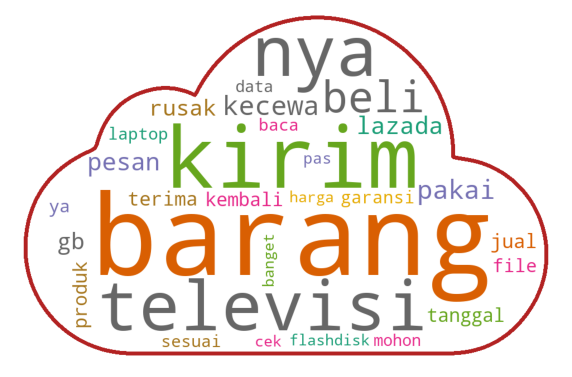

In [ ]:
# WordCloud Label rating 1

kata = df_new_cut[df_new_cut.rating == 1]
rating_string = []

for t in kata.cleanReview:
  rating_string.append(t)

normal_string = pd.Series(rating_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

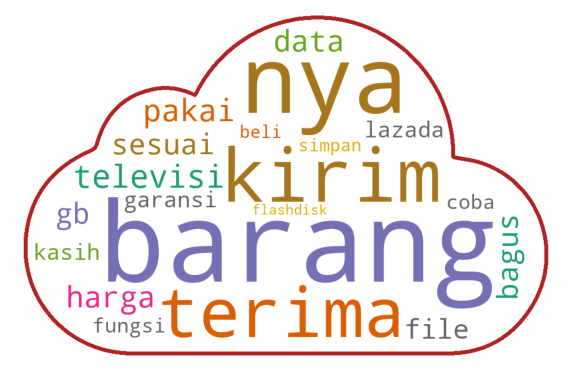

In [ ]:
# WordCloud Label rating 2

kata = df_new_cut[df_new_cut.rating == 2]
rating_string = []

for t in kata.cleanReview:
  rating_string.append(t)

normal_string = pd.Series(rating_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

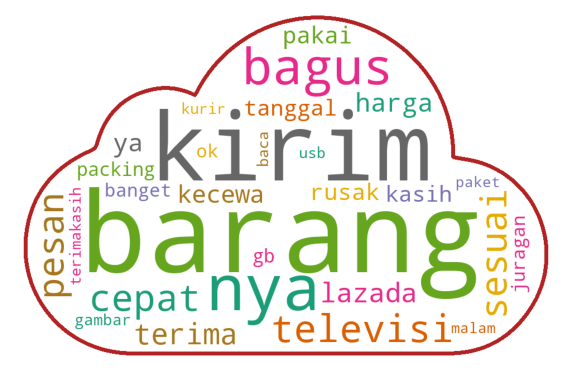

In [ ]:
# WordCloud Label rating 3

kata = df_new_cut[df_new_cut.rating == 3]
rating_string = []

for t in kata.cleanReview:
  rating_string.append(t)

normal_string = pd.Series(rating_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

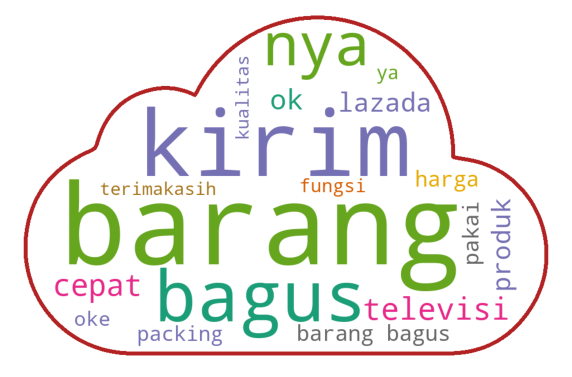

In [ ]:
# WordCloud Label rating 4

kata = df_new_cut[df_new_cut.rating == 4]
rating_string = []

for t in kata.cleanReview:
  rating_string.append(t)

normal_string = pd.Series(rating_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

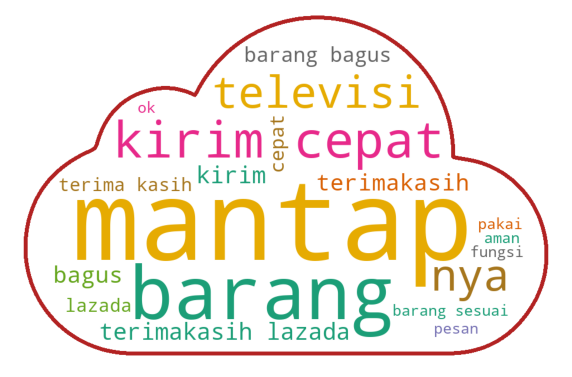

In [ ]:
# WordCloud Label rating 5

kata = df_new_cut[df_new_cut.rating == 5]
rating_string = []

for t in kata.cleanReview:
  rating_string.append(t)

normal_string = pd.Series(rating_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800, margin=10,
                      background_color='white', colormap='Dark2',
                      max_font_size=200, min_font_size=25,
                      mask=cloud_mask, contour_width=10, contour_color='firebrick',
                      max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Resume

setelah melakukan text preprocessing dan feature enginnering kemudian dilakukan modelling data , dengan train dan test dibagi 80 % : 20 % kemudian tetapi perlu dingat train ini data rating 5 terlalu banyak dibangding dengan rating lainnya, fitur merupakan review dari pembeli dan target yaitu rating yang digunakan , kemudian dilakukan pemodelan, setelah dilakukan melakukan evaluasi report matrix, jumlah salah dan benar dalam redict, dan juga cross validasi, setelah itu dilakukan deployment model terhadap data inputan baru sehingga dapat di kategorikan mana yang review sentiment pembeli masuk ke kategori rating berapa.

terakhir tidak lupa membuat wordcloud berdasarkan rating pembeli.
dari beberapa proses modelling saya gunakan dengan beberapa algoritma kalsifikasi seperti KNN,SGD, Naive bayes, MLP, random forest,dan decision tree. Saya memilih SGD karena prosesnya cepat dan nilai akurasi lebih baik daripada algoritma klasifikasi lainnya. dengan averange acc 79,5%.